## Classify Recipes based on Ingredients

## Setup
- `pandas`
- `numpy`
- `sklearn`
- `seaborn`
- `matplotlib`

## Installation
- pip install pandas
- pip install numpy
- pip install scikit-learn
- pip install matplotlib

## Import Libraries

In [53]:
from tqdm import tqdm
import json
import scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import accuracy_score

## Data Ingesion
- Credits: [cognitiveclass.ai](https://apps.cognitiveclass.ai/learning/course/course-v1:IBM+GPXX04XREN+v1/block-v1:IBM+GPXX04XREN+v1+type@sequential+block@guided_project/block-v1:IBM+GPXX04XREN+v1+type@vertical+block@guided_project_lets_do_it)

In [2]:
## Uncomment below cell to download data

# data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-PY0181EN-SkillsNetwork/labs/2_linear_classifiers/data/data.json"

# !wget -O cuisine_classify.json data_url

In [3]:
!ls ../

01-Introduction  03-Numpy   05-Matplotlib   projects
02-Statistics	 04-Pandas  06-Probability  text-mining


**pd.read_json**

In [10]:
DATA_PATH = '../../Data/cuisine_classify.json'

df_cuisine = pd.read_json(DATA_PATH)
df_cuisine.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [11]:
# check shape
df_cuisine.shape

(39774, 3)

In [12]:
# top five rows
df_cuisine.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [13]:
# Target Distribution
df_cuisine['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

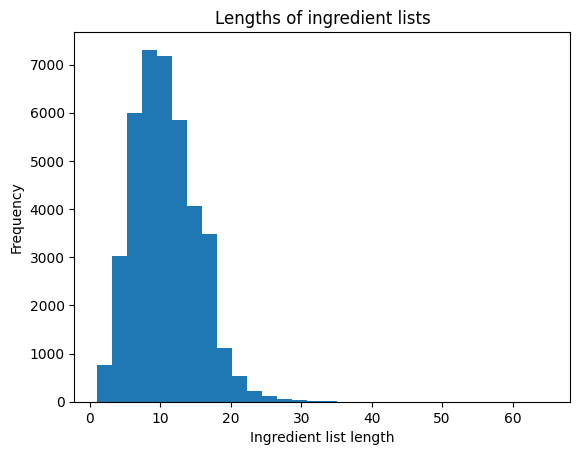

In [14]:
# histogram
plt.hist(df_cuisine['ingredients'].apply(lambda x: len(x)), bins = 30)
plt.title("Lengths of ingredient lists")
plt.xlabel("Ingredient list length")
plt.ylabel("Frequency")
plt.show()

**Text Vectorization**
- It is the process of converting textual data into numerical vectors.
- We'll use scikit-learn `CountVectorizer`
- It converts collection of text documents to a matrix of token counts.

In [27]:
# get first ingredients
print(df_cuisine.loc[0, 'ingredients'])
print(f"Type: {type(df_cuisine.loc[0, 'ingredients'])}")

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
Type: <class 'list'>


In [30]:
# Convert list into one string
# Column: ingredients

ingredients = df_cuisine['ingredients'].astype(str).apply(lambda x: x.strip('[]'))
ingredients

0        'romaine lettuce', 'black olives', 'grape toma...
1        'plain flour', 'ground pepper', 'salt', 'tomat...
2        'eggs', 'pepper', 'salt', 'mayonaise', 'cookin...
3                'water', 'vegetable oil', 'wheat', 'salt'
4        'black pepper', 'shallots', 'cornflour', 'caye...
                               ...                        
39769    'light brown sugar', 'granulated sugar', 'butt...
39770    'KRAFT Zesty Italian Dressing', 'purple onion'...
39771    'eggs', 'citrus fruit', 'raisins', 'sourdough ...
39772    'boneless chicken skinless thigh', 'minced gar...
39773    'green chile', 'jalapeno chilies', 'onions', '...
Name: ingredients, Length: 39774, dtype: object

In [31]:
# Apply Count Vectorization
cv = CountVectorizer(ngram_range=(1, 2), max_features=200)
tf = cv.fit_transform(ingredients)

tf

<39774x200 sparse matrix of type '<class 'numpy.int64'>'
	with 728408 stored elements in Compressed Sparse Row format>

In [37]:
# get feature vector dataframe

df_vectorized = pd.DataFrame(tf.toarray(), columns=cv.get_feature_names_out())
df_vectorized

,all,all purpose,avocado,baking,baking powder,basil,bay,beans,beef,bell,...,vegetable oil,vinegar,virgin,virgin olive,water,white,white wine,whole,wine,yellow
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,0
39770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


- **Observations**
    - Our columns contains single word (unigram) and pair of words (bigram)
    - There are 39774 rows which is total samples, and 200 columns with many 0's. This means matrix is very sparse.

- Several Other Options for vectorization
    - `tf-idf` matrix
    - Word Embeddings (`word2vec`, `GLOVE`, `BERT` and so on)

In [42]:
# target distribution
df_cuisine['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

- Data is imbalanced, we will stratied Train Test split

## Modeling
- Now, Let's Build Classifier to classify among several Cuisines.
- Algorithms:
    - Logistic Regression.

In [43]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_vectorized, df_cuisine['cuisine'], 
                                                    test_size=0.33,
                                                    stratify=df_cuisine['cuisine'],
                                                    random_state=1)

/tmp/ipykernel_1302216/1509781584.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


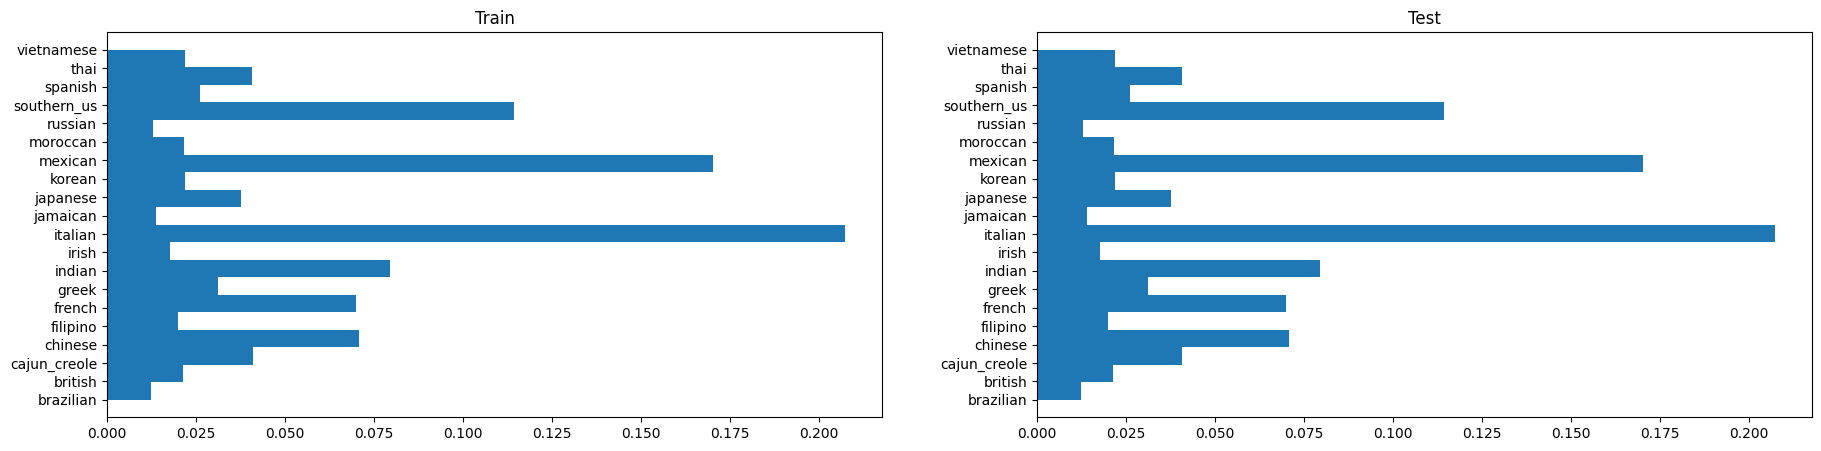

In [44]:
fig, ax = plt.subplots(1, 2,figsize=(22,5))

ax[0].hist(y_train.sort_values(),orientation='horizontal', bins=20, density=True)
ax[1].hist(y_test.sort_values(),orientation='horizontal', bins=20, density=True)
ax[0].set_title('Train')
ax[1].set_title('Test')
fig.show()

- From above we can see data distribution of train and test is same.

In [46]:
# fit logistic regression

lr = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)

/home/fm-pc-lt-125/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# classification report
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   brazilian       0.41      0.23      0.29       154
     british       0.37      0.19      0.25       265
cajun_creole       0.72      0.58      0.64       510
     chinese       0.73      0.76      0.74       882
    filipino       0.62      0.43      0.51       249
      french       0.48      0.48      0.48       873
       greek       0.59      0.43      0.49       388
      indian       0.77      0.79      0.78       991
       irish       0.52      0.34      0.41       220
     italian       0.69      0.81      0.74      2587
    jamaican       0.70      0.52      0.59       174
    japanese       0.50      0.45      0.47       470
      korean       0.72      0.66      0.69       274
     mexican       0.84      0.87      0.85      2125
    moroccan       0.74      0.65      0.69       271
     russian       0.49      0.28      0.36       161
 southern_us       0.51      0.64      0.57      1426
     spanish       0.45    

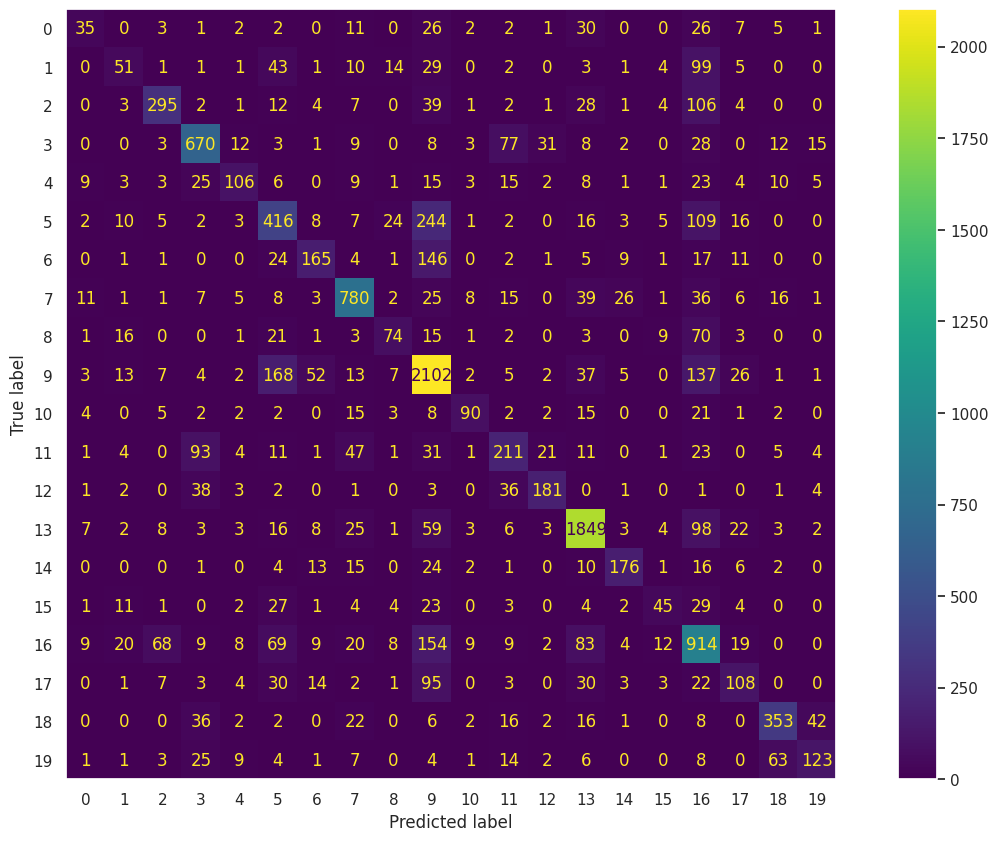

In [57]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()
plt.grid(False)
plt.show()

- From above we can see result is not that satisfactory.
- Let's try following ways to improve the result
    - Implementing Cross Validation
    - Increase the amount of features
    - Playing with Count Vectorizer feature ngram sizes
    - Reduce dimensionality of feature matrix while increasing amount of features
    - Playing with training/testing set sizes

**Option1: Implementing cross validation**
- Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. 

- <img src='images/1.png' width='500'>
            
    - [Source](https://stackoverflow.com/questions/57021928/how-to-create-a-k-fold-cross-validation-test)

- When k=5,
    - Data will be divided into 5 parts with different training and testing splits.
    - Model will be trained on each parts of the splitted data separately.
    - This way model generalizability will increase.

In [60]:
# k-fold cross validation

lr_cv = LogisticRegressionCV(multi_class='multinomial', cv=5).fit(X_train, y_train)

/home/fm-pc-lt-125/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fm-pc-lt-125/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [62]:
# get prediction
y_pred = lr_cv.predict(X_test)

In [63]:
# get classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   brazilian       0.46      0.21      0.29       154
     british       0.41      0.18      0.25       265
cajun_creole       0.72      0.57      0.64       510
     chinese       0.72      0.76      0.74       882
    filipino       0.63      0.42      0.50       249
      french       0.48      0.47      0.48       873
       greek       0.59      0.40      0.48       388
      indian       0.77      0.79      0.78       991
       irish       0.52      0.31      0.39       220
     italian       0.68      0.82      0.74      2587
    jamaican       0.73      0.52      0.61       174
    japanese       0.51      0.45      0.48       470
      korean       0.74      0.66      0.69       274
     mexican       0.83      0.88      0.85      2125
    moroccan       0.74      0.65      0.69       271
     russian       0.56      0.28      0.37       161
 southern_us       0.50      0.65      0.57      1426
     spanish       0.48    

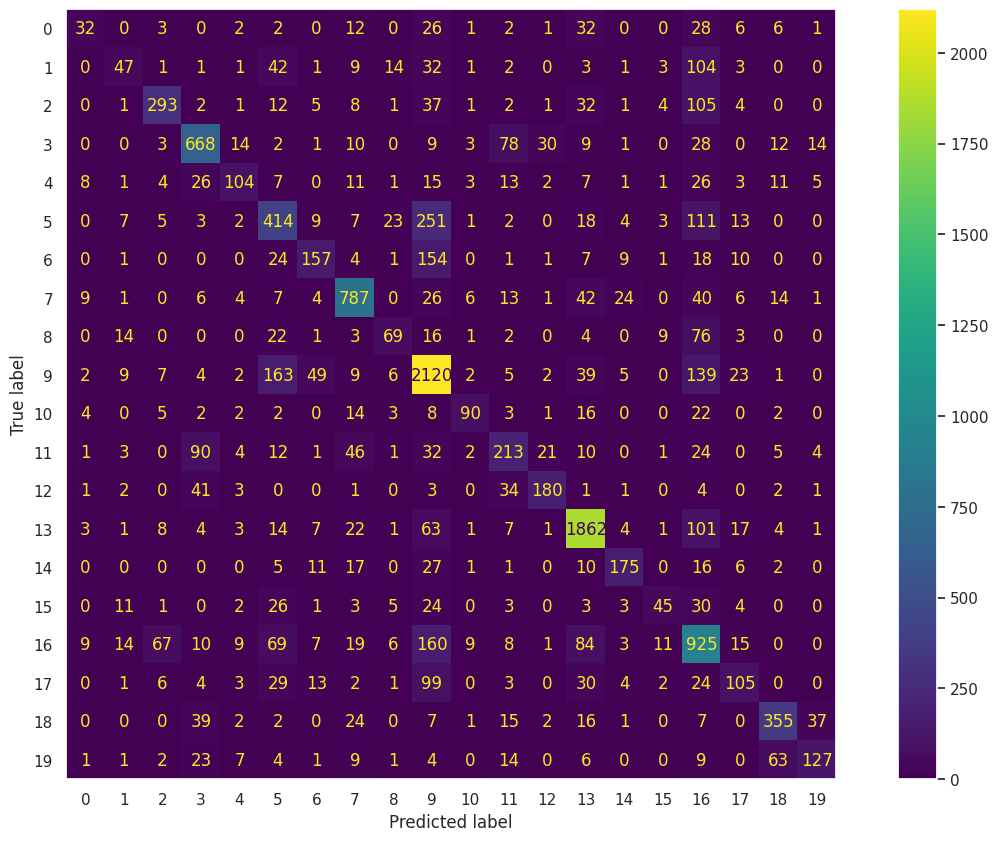

In [64]:
# get confusion matrix

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()
plt.grid(False)
plt.show()

- From above classification report, we see that using cross-validation didn't improve the accuracy as F1-score remains same before and after using the cross-validation.

**Option2: Increase the number of features**
- Initially we initialize `CountVectorizer` with 200 features.
- Now, let's increase this number to 1000 and see how the model performs

In [66]:
# Increase the number of features
cv_lg = CountVectorizer(ngram_range=(1, 2), max_features=1000)
tf_lg = cv_lg.fit_transform(ingredients)

In [67]:
tf_lg.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [69]:
# get vectorized dataframe
df_vectorized_lg = pd.DataFrame(tf_lg.toarray(), columns=cv_lg.get_feature_names_out())
df_vectorized_lg.head()

,active,active dry,adobo,all,all purpose,allspice,almond,almonds,ancho,anchovy,...,yellow bell,yellow corn,yellow onion,yoghurt,yogurt,yolks,yukon,yukon gold,zest,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [71]:
# Train Test split

X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(df_vectorized_lg, df_cuisine['cuisine'],
                 test_size=0.33, stratify=df_cuisine['cuisine'], random_state=1)

In [72]:
# Fit Logistic Regression
lr_cv_lg = LogisticRegressionCV(cv=5).fit(X_train_lg, y_train_lg)

/home/fm-pc-lt-125/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fm-pc-lt-125/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

KeyboardInterrupt: 

In [ ]:
# get prediction
y_pred_lg = lr_cv_lg.predict(y_test)

In [ ]:
# get classification report
print(classification_report(y_test, y_pred_lg))

**Option3: Playing with Count Vectorizer feature ngram sizes**
- While instantiating `CountVectorizer()` we use ngram_range = (1, 2).
- Now let's use feature with only single words but not double or more words, via setting ngram_range=(1, 1)

In [ ]:
# adjust ngram_range=(1, 1)

cv_lg_oneword = CountVectorizer(ngram_range=(1, 1), max_features=1000)
tf_lg_oneword = cv_lg_oneword.fit_transform(ingredients)